# Importing modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

In [4]:
df = pd.read_csv('data.csv')

In [5]:
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

price               AxesSubplot(0.125,0.653529;0.133621x0.226471)
bedrooms         AxesSubplot(0.285345,0.653529;0.133621x0.226471)
bathrooms         AxesSubplot(0.44569,0.653529;0.133621x0.226471)
sqft_living      AxesSubplot(0.606034,0.653529;0.133621x0.226471)
sqft_lot         AxesSubplot(0.766379,0.653529;0.133621x0.226471)
floors              AxesSubplot(0.125,0.381765;0.133621x0.226471)
waterfront       AxesSubplot(0.285345,0.381765;0.133621x0.226471)
view              AxesSubplot(0.44569,0.381765;0.133621x0.226471)
condition        AxesSubplot(0.606034,0.381765;0.133621x0.226471)
sqft_above       AxesSubplot(0.766379,0.381765;0.133621x0.226471)
sqft_basement           AxesSubplot(0.125,0.11;0.133621x0.226471)
yr_built             AxesSubplot(0.285345,0.11;0.133621x0.226471)
yr_renovated          AxesSubplot(0.44569,0.11;0.133621x0.226471)
dtype: object

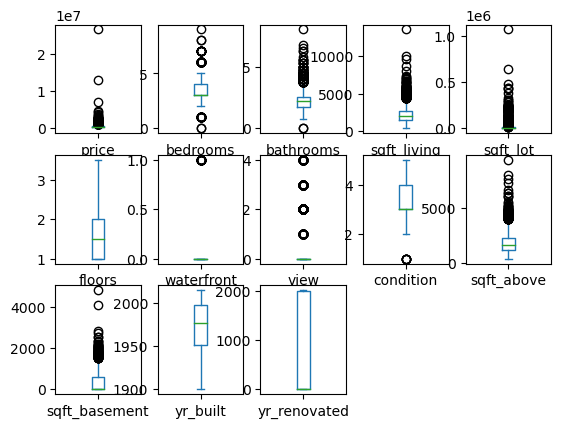

In [8]:
df.plot(kind ='box',subplots = True, layout =(3,5),sharex = False)

# Preprocessing the dataset

In [9]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<AxesSubplot:>

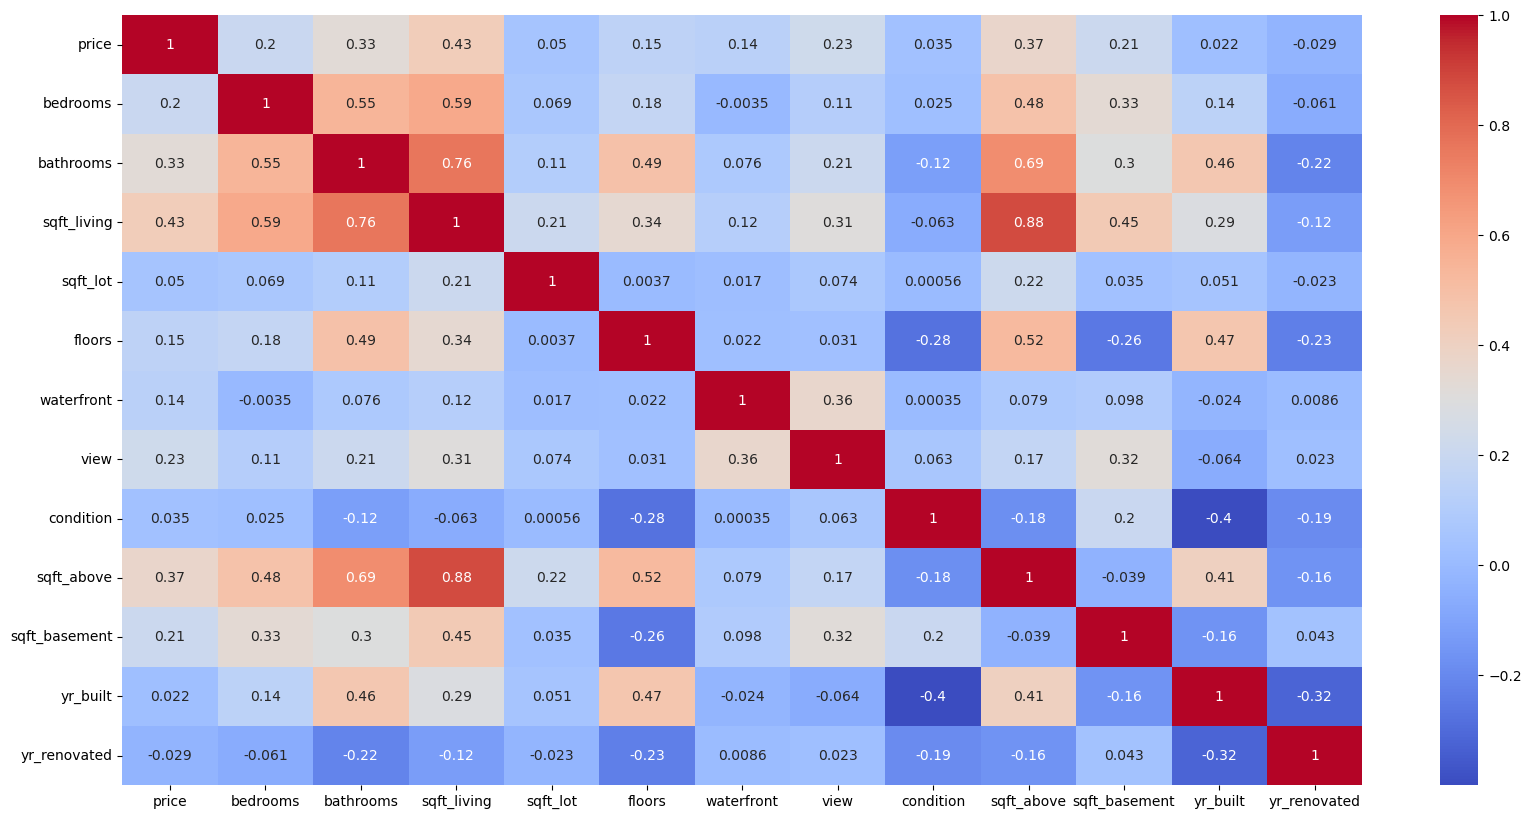

In [10]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']

# Train-Test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']
X_train.columns = feature_names
X_test.columns = feature_names

# Model building

<AxesSubplot:title={'center':'Model Coefficients'}>

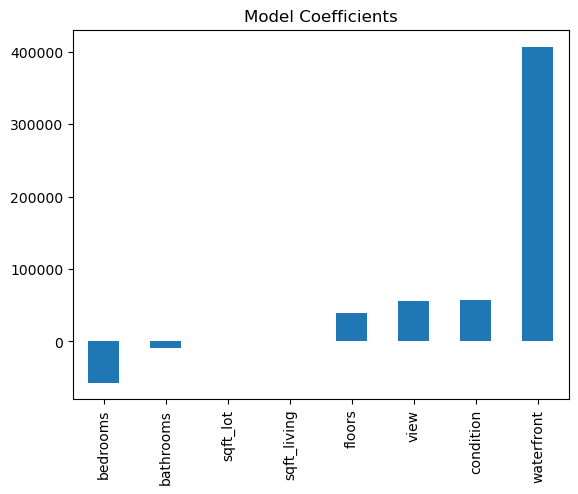

In [34]:
model = LinearRegression()

# train data
model.fit(X_train, y_train)

# predict data
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

# Evaluating the model

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_test_pred)

In [36]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 986869414953.9731
R-squared: 0.03233518995633189


In [37]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train , y_train)
lr_clf.score(X_test,y_test)

0.03233518995633189

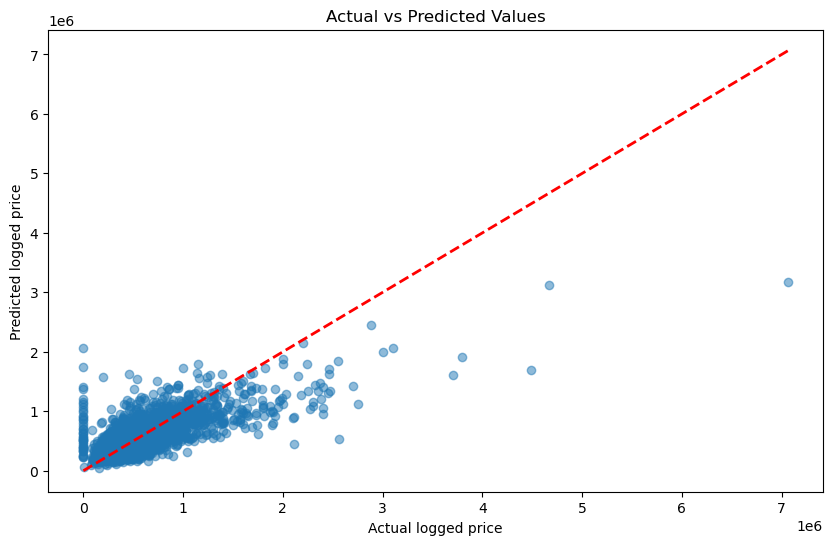

In [41]:
model.fit(X_train,y_train)
plt.figure(figsize=(10,6))
plt.scatter(y_train,y_train_pred,alpha=0.5)
plt.xlabel("Actual logged price")
plt.ylabel("Predicted logged price")
plt.title("Actual vs Predicted Values")

plt.plot([min(y_train),max(y_train)],[min(y_train),max(y_train)],color='red',linestyle='--',lw=2)
plt.show()

In [27]:
def predict_price(bedrooms,bathrooms,sqft_living,floors):
    
    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = sqft_living
    x[3] = floors
    return lr_clf.predict([x])[0]

In [28]:
predict_price(2 ,1, 900,2 )

C:\Users\Sagar Naidu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


18413.850479605026